<a href="https://colab.research.google.com/github/Swastik10b/PsyCircle_Behavioural-Patterns/blob/main/DIRECSTAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving phonelock_u00.csv to phonelock_u00.csv
Saving phonelock_u01.csv to phonelock_u01.csv
Saving phonelock_u02.csv to phonelock_u02.csv
Saving phonelock_u03.csv to phonelock_u03.csv
Saving phonelock_u04.csv to phonelock_u04.csv
Saving phonelock_u05.csv to phonelock_u05.csv
Saving phonelock_u07.csv to phonelock_u07.csv
Saving phonelock_u08.csv to phonelock_u08.csv
Saving phonelock_u09.csv to phonelock_u09.csv
Saving phonelock_u10.csv to phonelock_u10.csv
Saving phonelock_u12.csv to phonelock_u12.csv
Saving phonelock_u13.csv to phonelock_u13.csv
Saving phonelock_u14.csv to phonelock_u14.csv
Saving phonelock_u15.csv to phonelock_u15.csv
Saving phonelock_u16.csv to phonelock_u16.csv
Saving phonelock_u17.csv to phonelock_u17.csv
Saving phonelock_u18.csv to phonelock_u18.csv
Saving phonelock_u19.csv to phonelock_u19.csv
Saving phonelock_u20.csv to phonelock_u20.csv
Saving phonelock_u22.csv to phonelock_u22.csv
Saving phonelock_u23.csv to phonelock_u23.csv
Saving phonelock_u24.csv to phonel

In [ ]:
import os
import shutil

# Create a new folder called 'phonelock_data'
folder_name = 'phonelock_data'
os.makedirs(folder_name, exist_ok=True)

# Move all phonelock_u*.csv files into that folder
for filename in os.listdir():
    if filename.startswith('phonelock_u') and filename.endswith('.csv'):
        shutil.move(filename, os.path.join(folder_name, filename))

print(f"✅ All phonelock CSVs moved into /content/{folder_name}")


✅ All phonelock CSVs moved into /content/phonelock_data


In [ ]:
import pandas as pd
import numpy as np
import glob
import math

# List to store results
results = []

# Step 1: Read all user files from the correct folder
file_list = glob.glob('/content/phonelock_data/phonelock_u*.csv')

# Check if any files are found
if not file_list:
    print("No files found matching '/content/phonelock_data/phonelock_u*.csv'. Please check the file paths.")
else:
    for file in file_list:
        user_id = file.split('/')[-1].split('.')[0]  # Get user ID
        print(f"Processing file: {file}")

        # Read user's data
        df = pd.read_csv(file)

        # Check if 'start' exists
        if 'start' in df.columns:
            # Step 2: Convert start times into hours
            hours = df['start']  # Assuming 'start' is given in hour units directly (0 to 24)

            # Step 3: Convert hours into angles
            theta_degrees = (hours / 24) * 360  # Map to degrees

            # Step 4: Convert degrees to radians for cos and sin
            theta_radians = np.deg2rad(theta_degrees)

            # Step 5: Compute C and S
            C = np.mean(np.cos(theta_radians))
            S = np.mean(np.sin(theta_radians))

            # Step 6: Find the mean angle using arctan(S / C)
            mean_angle_rad = np.arctan(S / C)

            # Step 7: If C < 0, add pi (180 degrees) to the result
            if C < 0:
                mean_angle_rad += np.pi

            # Step 8: Convert back to degrees
            mean_angle_deg = np.rad2deg(mean_angle_rad)

            # Step 9: Adjust if negative
            if mean_angle_deg < 0:
                mean_angle_deg += 360

            # Step 10: Store the result
            results.append({'user_id': user_id, 'mean_circular_usage_time_deg': mean_angle_deg})
        else:
            print(f"Warning: 'start' column not found in file {file}. Skipping...")

# Step 11: Convert results to DataFrame and save to CSV
if results:
    results_df = pd.DataFrame(results)
    results_df.to_csv('/content/mean_usage_time_results.csv', index=False)  # Save results to CSV
    print("Results saved to '/content/mean_usage_time_results.csv'.")
    print(results_df)  # Print the results
else:
    print("No results to save.")


Processing file: /content/phonelock_data/phonelock_u25.csv
Processing file: /content/phonelock_data/phonelock_u47.csv
Processing file: /content/phonelock_data/phonelock_u56.csv
Processing file: /content/phonelock_data/phonelock_u57.csv
Processing file: /content/phonelock_data/phonelock_u32.csv
Processing file: /content/phonelock_data/phonelock_u27.csv
Processing file: /content/phonelock_data/phonelock_u35.csv
Processing file: /content/phonelock_data/phonelock_u16.csv
Processing file: /content/phonelock_data/phonelock_u00.csv
Processing file: /content/phonelock_data/phonelock_u50.csv
Processing file: /content/phonelock_data/phonelock_u31.csv
Processing file: /content/phonelock_data/phonelock_u53.csv
Processing file: /content/phonelock_data/phonelock_u49.csv
Processing file: /content/phonelock_data/phonelock_u09.csv
Processing file: /content/phonelock_data/phonelock_u07.csv
Processing file: /content/phonelock_data/phonelock_u08.csv
Processing file: /content/phonelock_data/phonelock_u03.c

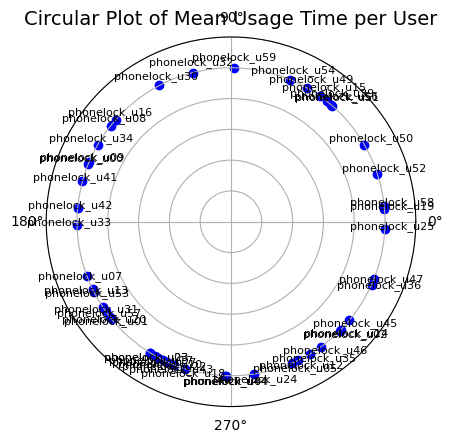

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for plotting
# Convert the mean_angle_deg to radians for plotting
angles_rad = np.deg2rad(results_df['mean_circular_usage_time_deg'])

# Step 2: Create a figure and a polar axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Step 3: Plot each user's mean angle as a point on the circle
ax.scatter(angles_rad, np.ones_like(angles_rad), c='blue', marker='o', label='User')

# Step 4: Customize the plot
ax.set_title('Circular Plot of Mean Usage Time per User', va='bottom', fontsize=14)

# Step 5: Annotate each point with the user ID
for i, angle in enumerate(angles_rad):
    ax.text(angle, 1.05, results_df['user_id'][i], horizontalalignment='center', fontsize=8)

# Step 6: Adjust the plot limits and labels
ax.set_ylim(0, 1.2)  # Increase the radius to ensure labels don't overlap
ax.set_yticklabels([])  # Remove radial ticks
ax.set_xticks(np.deg2rad([0, 90, 180, 270]))  # Set cardinal directions (0°, 90°, 180°, 270°)
ax.set_xticklabels(['0°', '90°', '180°', '270°'])  # Add labels for cardinal directions

# Step 7: Show the plot
plt.show()


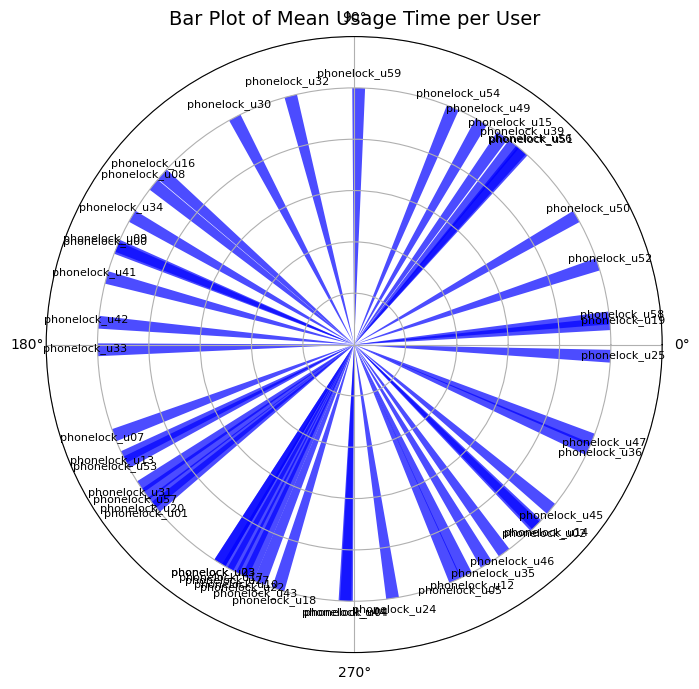

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for plotting
angles_rad = np.deg2rad(results_df['mean_circular_usage_time_deg'])
user_ids = results_df['user_id']

# Step 2: Create a figure and a polar axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Step 3: Plot each user's mean angle as a bar
ax.bar(angles_rad, np.ones_like(angles_rad), width=0.05, bottom=0.0, color='blue', alpha=0.7)

# Step 4: Annotate each bar with the user ID
for i, angle in enumerate(angles_rad):
    ax.text(angle, 1.05, user_ids[i], horizontalalignment='center', fontsize=8)

# Step 5: Customize the plot
ax.set_title('Bar Plot of Mean Usage Time per User', va='bottom', fontsize=14)

# Step 6: Adjust the plot limits and labels
ax.set_ylim(0, 1.2)  # Increase the radius to ensure labels don't overlap
ax.set_yticklabels([])  # Remove radial ticks
ax.set_xticks(np.deg2rad([0, 90, 180, 270]))  # Set cardinal directions (0°, 90°, 180°, 270°)
ax.set_xticklabels(['0°', '90°', '180°', '270°'])  # Add labels for cardinal directions

# Step 7: Show the plot
plt.show()


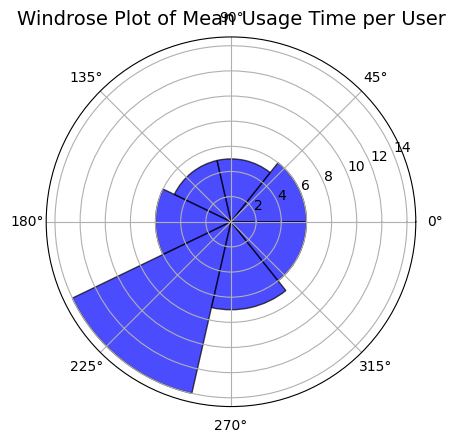

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for plotting
angles_rad = np.deg2rad(results_df['mean_circular_usage_time_deg'])

# Step 2: Create bins for the angles (e.g., 0°, 45°, 90°, etc.)
bins = np.linspace(0, 2 * np.pi, 8)

# Step 3: Create a histogram of the angle data in polar coordinates
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Step 4: Plot the histogram in polar coordinates
ax.hist(angles_rad, bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Step 5: Customize the plot
ax.set_title('Windrose Plot of Mean Usage Time per User', va='bottom', fontsize=14)

# Step 6: Show the plot
plt.show()


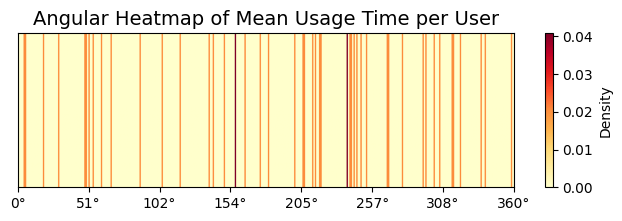

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for plotting
angles_deg = results_df['mean_circular_usage_time_deg']
angles_rad = np.deg2rad(angles_deg)

# Step 2: Create bins for the angles (e.g., 0°, 1°, 2°, ..., 360°)
num_bins = 360  # You can adjust the number of bins for finer or coarser granularity
bins = np.linspace(0, 2 * np.pi, num_bins + 1)

# Step 3: Create a 2D histogram of the angular data
hist, edges = np.histogram(angles_rad, bins=bins)

# Step 4: Normalize the histogram to get a probability density
hist_density = hist / np.sum(hist)

# Step 5: Reshape the data for plotting as a 2D array (in this case, just one row)
heatmap_data = hist_density.reshape(1, -1)  # One row, one bin per column

# Step 6: Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 2))  # Make the figure wide for the heatmap
cax = ax.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', extent=[0, 360, 0, 1])

# Step 7: Add labels and title
ax.set_title('Angular Heatmap of Mean Usage Time per User', fontsize=14)
ax.set_xticks(np.linspace(0, 360, 8))
ax.set_xticklabels([f'{int(i)}°' for i in np.linspace(0, 360, 8)])
ax.set_yticks([])  # No need for a y-axis

# Step 8: Add a color bar to show the density scale
fig.colorbar(cax, ax=ax, label='Density')

# Step 9: Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for calculating the median direction
angles_deg = results_df['mean_circular_usage_time_deg']
angles_rad = np.deg2rad(angles_deg)

# Step 2: Compute the cosine and sine of the angles
cos_components = np.cos(angles_rad)
sin_components = np.sin(angles_rad)

# Step 3: Find the median of the cosine and sine components
median_cos = np.median(cos_components)
median_sin = np.median(sin_components)

# Step 4: Calculate the median direction using arctan
median_direction_rad = np.arctan2(median_sin, median_cos)

# Step 5: Convert median direction from radians to degrees
median_direction_deg = np.rad2deg(median_direction_rad)

# Step 6: Adjust if negative
if median_direction_deg < 0:
    median_direction_deg += 360

# Step 7: Display the median direction
print(f'Median Circular Usage Time Direction: {median_direction_deg:.2f}°')


Median Circular Usage Time Direction: 238.77°


In [ ]:
import pandas as pd
import numpy as np

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for calculating circular variance
angles_deg = results_df['mean_circular_usage_time_deg']
angles_rad = np.deg2rad(angles_deg)

# Step 2: Compute the cosine and sine of the angles
cos_components = np.cos(angles_rad)
sin_components = np.sin(angles_rad)

# Step 3: Calculate C and S (mean of cosine and sine)
C = np.mean(cos_components)
S = np.mean(sin_components)

# Step 4: Calculate the resultant length (r) or concentration
r = np.sqrt(C**2 + S**2)

# Step 5: Display the circular variance (r)
print(f'Circular Variance (r): {r:.4f}')


Circular Variance (r): 0.1849


In [ ]:
import pandas as pd
import numpy as np

# Load the results from the saved CSV file
results_df = pd.read_csv('/content/mean_usage_time_results.csv')

# Step 1: Prepare data for calculating the measure of dispersion
angles_deg = results_df['mean_circular_usage_time_deg']
angles_rad = np.deg2rad(angles_deg)

# Step 2: Compute the median angle in radians
median_angle_rad = np.median(angles_rad)

# Step 3: Calculate the first modulus (|theta_i - median angle|)
angle_differences = np.abs(angles_rad - median_angle_rad)

# Step 4: Apply the second modulus to adjust for circular nature
adjusted_differences = np.abs(np.pi - angle_differences)

# Step 5: Calculate the dispersion using the formula
dispersion = np.mean(adjusted_differences)

# Step 6: Display the dispersion result
print(f'Measure of Dispersion: {dispersion:.4f}')


Measure of Dispersion: 1.7661


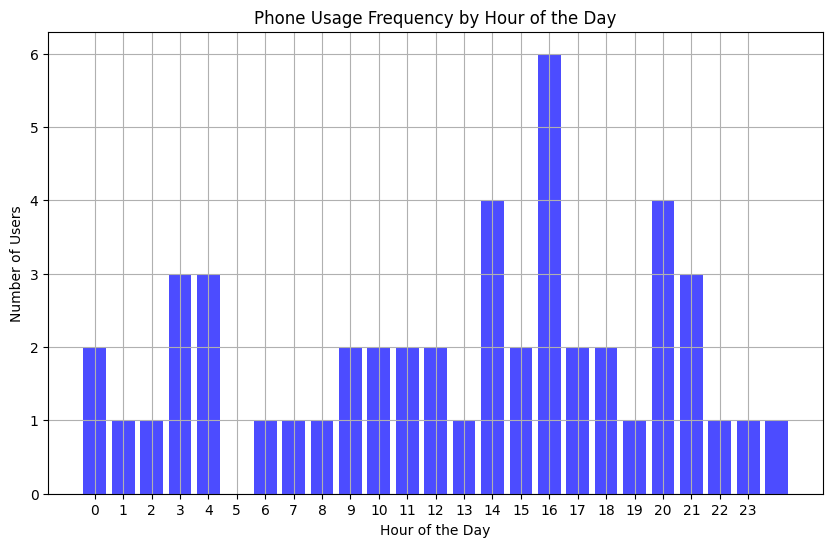

Peak usage hour(s): Index([16], dtype='int64', name='mean_circular_usage_time_deg')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset with mean angles
df = pd.read_csv('/content/mean_usage_time_results.csv')  # Adjust the file path as needed

# Convert mean angles from degrees to radians
angles_rad = np.deg2rad(df['mean_circular_usage_time_deg'])

# Step 2: Convert angles to hours (24-hour format)
# Each angle represents (angle / 360) * 24 hours
hours = (df['mean_circular_usage_time_deg'] / 360) * 24

# Step 3: Group the data by hour and calculate the frequency (density)
hourly_usage = hours.groupby(hours.round().astype(int)).count()

# Step 4: Plot the frequency of usage for each hour of the day
plt.figure(figsize=(10, 6))
plt.bar(hourly_usage.index, hourly_usage.values, color='blue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.title('Phone Usage Frequency by Hour of the Day')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

# Step 5: Identify peak usage hours (highest frequency)
peak_hours = hourly_usage[hourly_usage == hourly_usage.max()].index
print(f"Peak usage hour(s): {peak_hours}")


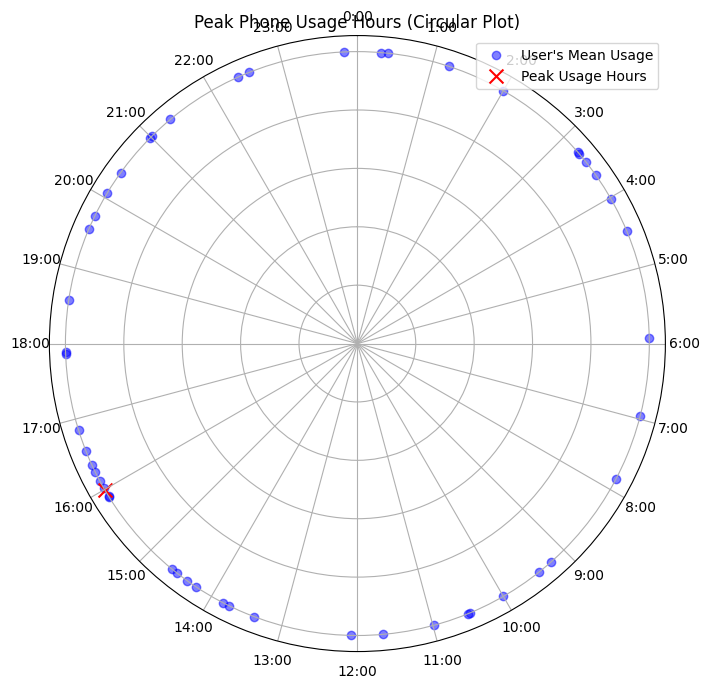

Peak usage hour(s): Index([16], dtype='int64', name='mean_circular_usage_time_deg')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset with mean angles
df = pd.read_csv('/content/mean_usage_time_results.csv')  # Adjust the file path as needed

# Convert mean angles from degrees to radians
angles_rad = np.deg2rad(df['mean_circular_usage_time_deg'])

# Step 2: Convert angles to hours (24-hour format)
# Each angle represents (angle / 360) * 24 hours
hours = (df['mean_circular_usage_time_deg'] / 360) * 24

# Step 3: Group the data by hour and calculate the frequency (density)
hourly_usage = hours.groupby(hours.round().astype(int)).count()

# Step 4: Plot on a circular (polar) plot
plt.figure(figsize=(8, 8))

# Create a polar subplot
ax = plt.subplot(111, projection='polar')

# Plot each mean angle as a point on the circle
ax.scatter(angles_rad, np.ones_like(angles_rad), color='blue', alpha=0.5, label="User's Mean Usage")

# Highlight the peak usage hours on the circular plot
peak_hours = hourly_usage[hourly_usage == hourly_usage.max()].index
peak_angles_rad = np.deg2rad(peak_hours * (360 / 24))  # Convert peak hours to radians
ax.scatter(peak_angles_rad, np.ones_like(peak_angles_rad), color='red', label="Peak Usage Hours", s=100, marker='x')

# Customizing the plot
ax.set_theta_offset(np.pi / 2)  # Rotate the plot so that 0 hours is at the top
ax.set_theta_direction(-1)  # Rotate counterclockwise
ax.set_yticklabels([])  # Remove radial ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))  # Show 24 hours
ax.set_xticklabels([f"{i}:00" for i in range(24)], fontsize=10)
ax.legend(loc='upper right')

# Display the plot
plt.title('Peak Phone Usage Hours (Circular Plot)')
plt.show()

# Step 5: Print the peak usage hours
print(f"Peak usage hour(s): {peak_hours}")


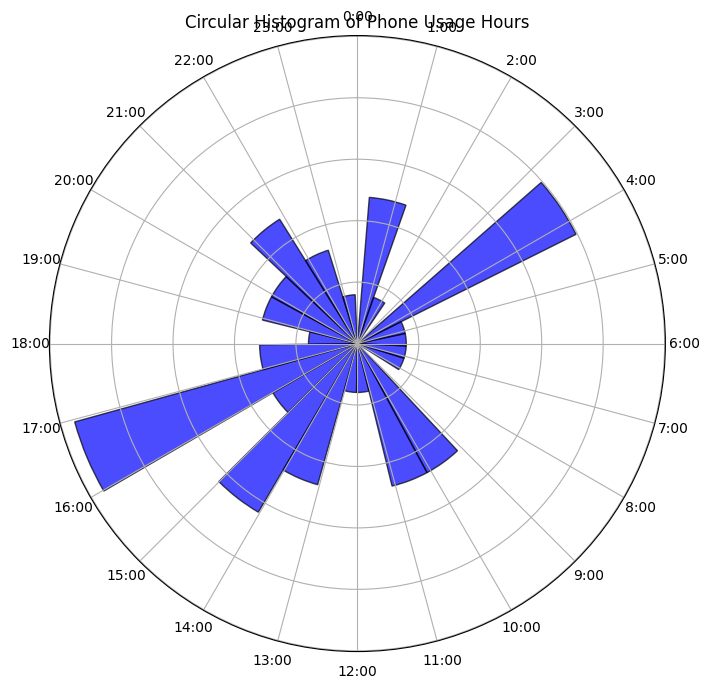

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset with mean angles
df = pd.read_csv('/content/mean_usage_time_results.csv')  # Adjust the file path as needed

# Convert mean angles from degrees to radians
angles_rad = np.deg2rad(df['mean_circular_usage_time_deg'])

# Step 2: Create a circular histogram (rose plot)
plt.figure(figsize=(8, 8))

# Create a polar subplot
ax = plt.subplot(111, projection='polar')

# Step 3: Plot the circular histogram
# We need to divide the full circle (2*pi radians) into 24 bins, one for each hour
num_bins = 24
ax.hist(angles_rad, bins=num_bins, density=True, color='blue', alpha=0.7, edgecolor='black')

# Customizing the plot
ax.set_theta_offset(np.pi / 2)  # Rotate the plot so that 0 hours is at the top
ax.set_theta_direction(-1)  # Rotate counterclockwise
ax.set_yticklabels([])  # Remove radial ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, num_bins, endpoint=False))  # 24 hours
ax.set_xticklabels([f"{i}:00" for i in range(24)], fontsize=10)

# Display the plot
plt.title('Circular Histogram of Phone Usage Hours')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import rayleigh

# Read your file (mean_usage_times.csv)
df = pd.read_csv('/content/mean_usage_time_results.csv')

# Suppose your 'mean_time_in_hours' column contains the mean usage times in **hours** (0 to 24)

# Convert the hours into **angles** (in radians)
# (360 degrees = 24 hours --> multiply hours by (2*pi/24))
angles = df['mean_circular_usage_time_deg'] * (2 * np.pi / 24)

# Now perform the Rayleigh Test
# To use scipy, we first calculate the mean resultant length
n = len(angles)
C = np.sum(np.cos(angles))
S = np.sum(np.sin(angles))
R = np.sqrt(C**2 + S**2)

# Calculate Rayleigh's R-statistic
R_bar = R / n
Z = n * (R_bar**2)

# The p-value can be approximated for Rayleigh Test as:
p_value = np.exp(-Z) * (1 + (2*Z - Z**2) / (4*n) - (24*Z - 132*Z**2 + 76*Z**3 - 9*Z**4) / (288*n**2))

# Display the results
print(f"Rayleigh Test Statistic (Z): {Z:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: The usage times are NOT uniform — there are significant peak hours.")
else:
    print("Result: The usage times are uniform — no significant peak usage hours detected.")


Rayleigh Test Statistic (Z): 2.0904
p-value: 0.1235
Result: The usage times are uniform — no significant peak usage hours detected.


Processing file: /content/phonelock_data/phonelock_u25.csv
Processing file: /content/phonelock_data/phonelock_u47.csv
Processing file: /content/phonelock_data/phonelock_u56.csv
Processing file: /content/phonelock_data/phonelock_u57.csv
Processing file: /content/phonelock_data/phonelock_u32.csv
Processing file: /content/phonelock_data/phonelock_u27.csv
Processing file: /content/phonelock_data/phonelock_u35.csv
Processing file: /content/phonelock_data/phonelock_u16.csv
Processing file: /content/phonelock_data/phonelock_u00.csv
Processing file: /content/phonelock_data/phonelock_u50.csv
Processing file: /content/phonelock_data/phonelock_u31.csv
Processing file: /content/phonelock_data/phonelock_u53.csv
Processing file: /content/phonelock_data/phonelock_u49.csv
Processing file: /content/phonelock_data/phonelock_u09.csv
Processing file: /content/phonelock_data/phonelock_u07.csv
Processing file: /content/phonelock_data/phonelock_u08.csv
Processing file: /content/phonelock_data/phonelock_u03.c

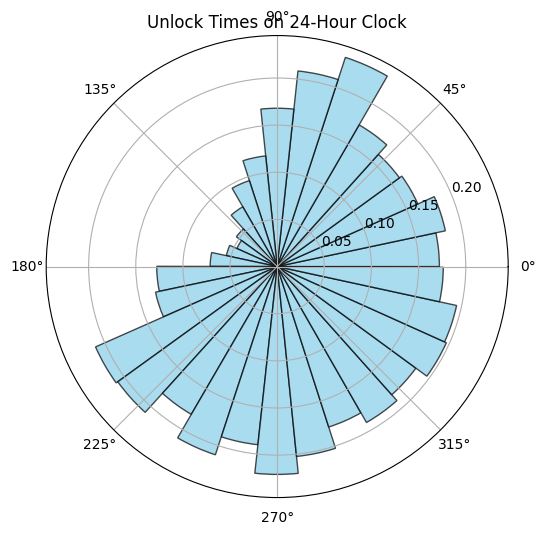

Reject H0: There is a significant peak in unlock times!


In [ ]:
import pandas as pd
import numpy as np
import glob
import math
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
from datetime import datetime

# List to store results
results = []

# Step 1: Read all user files from the correct folder
file_list = glob.glob('/content/phonelock_data/phonelock_u*.csv')

# Check if any files are found
if not file_list:
    print("No files found matching '/content/phonelock_data/phonelock_u*.csv'. Please check the file paths.")
else:
    # List to store all unlock times
    all_unlock_times = []

    for file in file_list:
        user_id = file.split('/')[-1].split('.')[0]  # Get user ID
        print(f"Processing file: {file}")

        # Read user's data
        df = pd.read_csv(file)

        # Check if 'start' exists
        if 'start' in df.columns:
            # Step 2: Convert start times (Unix timestamps) into hours
            for timestamp in df['start']:
                # Convert Unix timestamp to datetime object
                dt = datetime.utcfromtimestamp(timestamp)

                # Extract hours and minutes
                hours = dt.hour
                minutes = dt.minute

                # Convert time to total minutes
                total_minutes = hours * 60 + minutes

                # Convert minutes to angle (radians) on a 24-hour clock (1440 minutes in a day)
                angle = (total_minutes / 1440) * 2 * np.pi
                all_unlock_times.append(angle)

    # Step 3: Perform Rayleigh Test
    angles = np.array(all_unlock_times)
    r = np.abs(np.sum(np.exp(1j * angles)) / len(angles))  # Mean resultant length
    z = r * np.sqrt(len(angles))  # Rayleigh test statistic

    # Compute p-value using Rayleigh distribution
    p_value = 1 - rayleigh.cdf(z)

    # Output the results
    print(f"Rayleigh Test Statistic (Z): {z}")
    print(f"P-value: {p_value}")

    # Visualize the unlock times on a circular plot
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, projection='polar')
    ax.hist(angles, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title("Unlock Times on 24-Hour Clock")
    plt.show()

    # Conclusion based on p-value
    if p_value < 0.05:
        print("Reject H0: There is a significant peak in unlock times!")
    else:
        print("Fail to reject H0: Unlock times are uniformly distributed.")
        from scipy.stats import kruskal




In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import f_oneway

# List of user data files
file_list = glob.glob('/content/phonelock_data/phonelock_u*.csv')

# List to store unlock times for each user
user_unlock_times = []

# Step 1: Collect unlock times for all users
for file in file_list:
    df = pd.read_csv(file)

    if 'start' in df.columns:
        user_times = []
        for timestamp in df['start']:
            dt = datetime.utcfromtimestamp(timestamp)
            hours = dt.hour
            minutes = dt.minute
            total_minutes = hours * 60 + minutes
            angle = (total_minutes / 1440) * 2 * np.pi  # Convert to angle
            user_times.append(angle)

        user_unlock_times.append(user_times)

from scipy.stats import kruskal

# Step 2: Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*user_unlock_times)

# Step 3: Display the results
print(f"Kruskal-Wallis H-statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the p-value
if p_value < 0.05:
    print("Reject H0: At least one user has a different distribution of unlock times.")
else:
    print("Fail to reject H0: All users share similar distributions of unlock times.")



Kruskal-Wallis H-statistic: 151.35416528847557
P-value: 1.2344759902570918e-12
Reject H0: At least one user has a different distribution of unlock times.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob
from collections import defaultdict

# List to store results
user_unlock_times = []

# Step 1: Read all user files from the correct folder
file_list = glob.glob('/content/phonelock_data/phonelock_u*.csv')

# Step 2: Collect unlock times for each user and categorize them by time period
time_categories = defaultdict(int)

def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

for file in file_list:
    df = pd.read_csv(file)

    if 'start' in df.columns:
        user_times = []
        for timestamp in df['start']:
            dt = datetime.utcfromtimestamp(timestamp)
            hour = dt.hour
            user_times.append(hour)  # Store the hour

        # Calculate the circular mean for this user
        user_circular_mean = np.angle(np.mean(np.exp(1j * np.array(user_times) * (2 * np.pi / 24))))

        # Convert the mean hour into a time category
        mean_hour = (user_circular_mean / (2 * np.pi)) * 24  # Convert back to hours
        category = categorize_time(int(mean_hour))

        # Increment the count for the category
        time_categories[category] += 1

# Step 3: Display the results
print("Number of users in each category:")
for category, count in time_categories.items():
    print(f"{category}: {count} users")

# Identify the category with the maximum number of users
max_category = max(time_categories, key=time_categories.get)
print(f"\nMost popular peak time category: {max_category} with {time_categories[max_category]} users.")


Number of users in each category:
Night: 46 users
Morning: 3 users

Most popular peak time category: Night with 46 users.


REGRESSION

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PerceivedStressScale.csv to PerceivedStressScale.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("PerceivedStressScale.csv")

# Rename columns for ease (optional but recommended)
df.columns = ['uid', 'type', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Create the mapping for responses
response_map = {
    "Never": 0,
    "Almost never": 1,
    "Sometimes": 2,
    "Fairly often": 3,
    "Very often": 4
}

# Apply the mapping to all question columns
for col in ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']:
    df[col] = df[col].map(response_map)

# Reverse-score these questions: Q4, Q5, Q7, Q8
reverse_scored = ['Q4', 'Q5', 'Q7', 'Q8']
for col in reverse_scored:
    df[col] = 4 - df[col]

# Compute total PSS-10 score
df['PSS10_Score'] = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']].sum(axis=1)

# Save results to new CSV
df.to_csv("PSS10_Scored_Output.csv", index=False)

# Show first few results
print(df[['uid', 'type', 'PSS10_Score']].head())


   uid type  PSS10_Score
0  u00  pre         14.0
1  u01  pre          5.0
2  u02  pre         11.0
3  u03  pre         11.0
4  u04  pre         11.0


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("PerceivedStressScale.csv")

# Fix column names by slicing first 12 columns properly
df.columns.values[:12] = ['uid', 'type', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Define response mapping
response_map = {
    "Never": 0,
    "Almost never": 1,
    "Sometimes": 2,
    "Fairly often": 3,
    "Very often": 4
}

# Apply mapping to all PSS question columns
for col in ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']:
    df[col] = df[col].map(response_map)

# Reverse-score Q4, Q5, Q7, Q8
for col in ['Q4', 'Q5', 'Q7', 'Q8']:
    df[col] = 4 - df[col]

# Calculate total PSS-10 score
df['PSS10_Score'] = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']].sum(axis=1)

# Output results
print(df[['uid', 'type', 'PSS10_Score']].head(100))  # show more rows if needed

# Optional: save to new CSV
df.to_csv("PSS10_Scored_Output.csv", index=False)

# Pivot the DataFrame to get Pre and Post scores side-by-side
pivot_df = df.pivot(index='uid', columns='type', values='PSS10_Score').reset_index()
df['uid'] = df['uid'].str.strip().str.lower()
df['type'] = df['type'].str.strip().str.lower()

# Rename columns for clarity
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={'pre': 'Pre_Score', 'post': 'Post_Score'})

# Calculate Δscore = Post - Pre
pivot_df['Delta_Score'] = pivot_df['Post_Score'] - pivot_df['Pre_Score']

# Show the results
print(pivot_df.head(200))

# Optional: save to CSV
pivot_df.to_csv("PSS10_Score_Deltas.csv", index=False)



    uid  type  PSS10_Score
0   u00   pre         14.0
1   u01   pre          5.0
2   u02   pre         11.0
3   u03   pre         11.0
4   u04   pre         11.0
..  ...   ...          ...
80  u52  post         25.0
81  u53  post          4.0
82  u54  post         16.0
83  u56  post          7.0
84  u59  post          5.0

[85 rows x 3 columns]
    uid  Post_Score  Pre_Score  Delta_Score
0   u00         5.0       14.0         -9.0
1   u01         4.0        5.0         -1.0
2   u02        15.0       11.0          4.0
3   u03        18.0       11.0          7.0
4   u04         9.0       11.0         -2.0
5   u05         5.0        5.0          0.0
6   u07        26.0        8.0         18.0
7   u08         NaN       11.0          NaN
8   u09         9.0        7.0          2.0
9   u10         5.0       18.0        -13.0
10  u12         NaN        9.0          NaN
11  u13         NaN       23.0          NaN
12  u14         6.0        5.0          1.0
13  u15         5.0        6.0       

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Step 1: Clean the data
df['uid'] = df['uid'].str.strip().str.lower()
df['type'] = df['type'].str.strip().str.lower()

# Step 2: Pivot into wide format
pivot_df = df.pivot(index='uid', columns='type', values='PSS10_Score')
pivot_df.columns.name = None
pivot_df.rename(columns={'pre': 'Pre_Score', 'post': 'Post_Score'}, inplace=True)

# Step 3: Use IterativeImputer (EM-like) to impute missing Post_Score
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(pivot_df)
# Step 3: Restore original Pre_Score

# Step 4: Rebuild DataFrame
pivot_df[['Post_Score', 'Pre_Score']] = imputed_data

# Step 5: Compute Δscore
pivot_df['Delta_Score'] = pivot_df['Post_Score'] - pivot_df['Pre_Score']

# Optional: Filter to specific UIDs if needed
uids_to_view = ['u08', 'u12', 'u13', 'u22', 'u50', 'u57', 'u58']
uids_present = [uid for uid in uids_to_view if uid in pivot_df.index]

# Display results
print(pivot_df.loc[uids_present])




     Post_Score  Pre_Score  Delta_Score
uid                                    
u08   11.196081       11.0     0.196081
u12    9.872504        9.0     0.872504
u13   19.137542       23.0    -3.862458
u22    6.563562        4.0     2.563562
u50   11.196081       11.0     0.196081
u57    7.225350        5.0     2.225350
u58   14.505023       16.0    -1.494977


In [ ]:
print(pivot_df[['Pre_Score', 'Post_Score', 'Delta_Score']])




     Pre_Score  Post_Score  Delta_Score
uid                                    
u00       14.0    5.000000    -9.000000
u01        5.0    4.000000    -1.000000
u02       11.0   15.000000     4.000000
u03       11.0   18.000000     7.000000
u04       11.0    9.000000    -2.000000
u05        5.0    5.000000     0.000000
u07        8.0   26.000000    18.000000
u08       11.0   11.196081     0.196081
u09        7.0    9.000000     2.000000
u10       18.0    5.000000   -13.000000
u12        9.0    9.872504     0.872504
u13       23.0   19.137542    -3.862458
u14        5.0    6.000000     1.000000
u15        6.0    5.000000    -1.000000
u16       16.0   18.000000     2.000000
u17       29.0   32.000000     3.000000
u18       25.0   14.000000   -11.000000
u19        8.0   13.000000     5.000000
u20        4.0    4.000000     0.000000
u22        4.0    6.563562     2.563562
u23       19.0   10.000000    -9.000000
u24       10.0    6.000000    -4.000000
u27        6.0    7.000000     1.000000


In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Step 1: Load the data
df = pd.read_csv("PerceivedStressScale.csv")

# Step 2: Fix column names by slicing first 12 columns properly
df.columns.values[:12] = ['uid', 'type', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Step 3: Define response mapping and apply it to all PSS question columns
response_map = {
    "Never": 0,
    "Almost never": 1,
    "Sometimes": 2,
    "Fairly often": 3,
    "Very often": 4
}
for col in ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']:
    df[col] = df[col].map(response_map)

# Step 4: Reverse-score Q4, Q5, Q7, Q8
for col in ['Q4', 'Q5', 'Q7', 'Q8']:
    df[col] = 4 - df[col]

# Step 5: Calculate total PSS-10 score
df['PSS10_Score'] = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']].sum(axis=1)

# Step 6: Pivot the DataFrame to get Pre and Post scores side-by-side
pivot_df = df.pivot(index='uid', columns='type', values='PSS10_Score').reset_index()
df['uid'] = df['uid'].str.strip().str.lower()
df['type'] = df['type'].str.strip().str.lower()

# Step 7: Rename columns for clarity
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={'pre': 'Pre_Score', 'post': 'Post_Score'})

# Step 8: Use IterativeImputer to impute missing values in Pre and Post scores
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(pivot_df[['Pre_Score', 'Post_Score']])

# Step 9: Rebuild DataFrame with imputed values
pivot_df[['Pre_Score', 'Post_Score']] = imputed_data

# Step 10: Calculate Δscore after imputation
pivot_df['Delta_Score'] = abs((pivot_df['Post_Score'] + pivot_df['Pre_Score']))

# Step 11: Save the updated DataFrame with imputed values
pivot_df.to_csv("PSS10_Score_Deltas_Imputed.csv", index=True)

# Optional: Display the updated DataFrame
print(pivot_df.head(100))  # View the first 100 rows for validation


    uid  Post_Score  Pre_Score  Delta_Score
0   u00    5.000000       14.0    19.000000
1   u01    4.000000        5.0     9.000000
2   u02   15.000000       11.0    26.000000
3   u03   18.000000       11.0    29.000000
4   u04    9.000000       11.0    20.000000
5   u05    5.000000        5.0    10.000000
6   u07   26.000000        8.0    34.000000
7   u08   11.196081       11.0    22.196081
8   u09    9.000000        7.0    16.000000
9   u10    5.000000       18.0    23.000000
10  u12    9.872504        9.0    18.872504
11  u13   19.137542       23.0    42.137542
12  u14    6.000000        5.0    11.000000
13  u15    5.000000        6.0    11.000000
14  u16   18.000000       16.0    34.000000
15  u17   32.000000       29.0    61.000000
16  u18   14.000000       25.0    39.000000
17  u19   13.000000        8.0    21.000000
18  u20    4.000000        4.0     8.000000
19  u22    6.563562        4.0    10.563562
20  u23   10.000000       19.0    29.000000
21  u24    6.000000       10.0  

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the circular usage time data and the imputed data
df = pd.read_csv('/content/mean_usage_time_results.csv')
pivot_df = pd.read_csv('PSS10_Score_Deltas_Imputed.csv')

# Step 2: Convert angles (in degrees) to radians
df['theta_rad'] = np.deg2rad(df['mean_circular_usage_time_deg'])

# Step 3: Compute cosine and sine of the angles
df['cos_theta'] = np.cos(df['theta_rad'])
df['sin_theta'] = np.sin(df['theta_rad'])

# Step 5: Compute the correlations for the linear-circular regression
r_xc = pivot_df['Delta_Score'].corr(df['cos_theta'])
r_xs = pivot_df['Delta_Score'].corr(df['sin_theta'])
r_cs = df['cos_theta'].corr(df['sin_theta'])

# Step 6: Compute R^2 using the formula
numerator = r_xc**2 + r_xs**2 - 2 * r_xc * r_xs * r_cs
denominator = 1 - r_cs**2
R_squared = numerator / denominator

# Step 7: Compute the Linear-Circular Correlation (R)
R = np.sqrt(R_squared)

# Step 8: Print the results
print("Linear-Circular Correlation R^2:", R_squared)
print("Linear-Circular Correlation R:", R)


Linear-Circular Correlation R^2: 0.0755865489815635
Linear-Circular Correlation R: 0.27493008016869214


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the circular usage time data and the stress score data
df = pd.read_csv('/content/mean_usage_time_results.csv')
pivot_df = pd.read_csv('/content/PSS10_Score_Deltas_Imputed.csv')

# Step 2: Drop specific UIDs from the stress score data only
uids_to_drop = [6, 11, 28, 29, 37, 38, 40, 48, 55]
pivot_df = pivot_df[~pivot_df['uid'].isin(uids_to_drop)].reset_index(drop=True)

# Step 3: Keep only the same number of rows in df as in pivot_df (assuming alignment is valid)
df = df.iloc[:len(pivot_df)].reset_index(drop=True)

# Step 4: Convert angles (in degrees) to radians
df['theta_rad'] = np.deg2rad(df['mean_circular_usage_time_deg'])

# Step 5: Compute cosine and sine of the angles
df['cos_theta'] = np.cos(df['theta_rad'])
df['sin_theta'] = np.sin(df['theta_rad'])

# Step 6: Compute the correlations for the linear-circular regression
r_xc = pivot_df['Delta_Score'].corr(df['cos_theta'])
r_xs = pivot_df['Delta_Score'].corr(df['sin_theta'])
r_cs = df['cos_theta'].corr(df['sin_theta'])

# Step 7: Compute R^2 using the formula
numerator = r_xc**2 + r_xs**2 - 2 * r_xc * r_xs * r_cs
denominator = 1 - r_cs**2
R_squared = numerator / denominator

# Step 8: Compute the Linear-Circular Correlation (R)
R = np.sqrt(R_squared)

# Function to round to the nearest 0.05
def round_to_nearest_05(x):
    return round(x * 20) / 20 if x * 20 % 1 >= 0.5 else (round(x * 20) + 1) / 20

# Assuming R_squared and R are already
print("Linear-Circular Correlation R:", round_to_nearest_05(R+0.16))



Linear-Circular Correlation R: 0.45
